In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

### Data cleaning:

In [5]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".") 


In [6]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df.rename(columns={"Production (Tons)":"Production(Tons)"}, inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"}, inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"}, inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"}, inplace=True)

In [8]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [9]:
df.isna().sum()   #checking for null value

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [10]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


Resets the DataFrame's index. By default, it generates a new integer-based index starting from 0 and assigns it as the row labels.
Optionally removes the existing index from becoming a column in the DataFrame.

In [11]:
df=df.dropna().reset_index()

In [12]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [13]:
df.drop(["index", "Unnamed: 0"], axis=1, inplace=True)

In [14]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [15]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [16]:
#now i need these values to be floating number point to work
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["Production_per_Person(Kg)"]=df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype(float)

In [17]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [18]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

### Univariate Analysis:

In [19]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produce sugarcane from each continent?

In [20]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

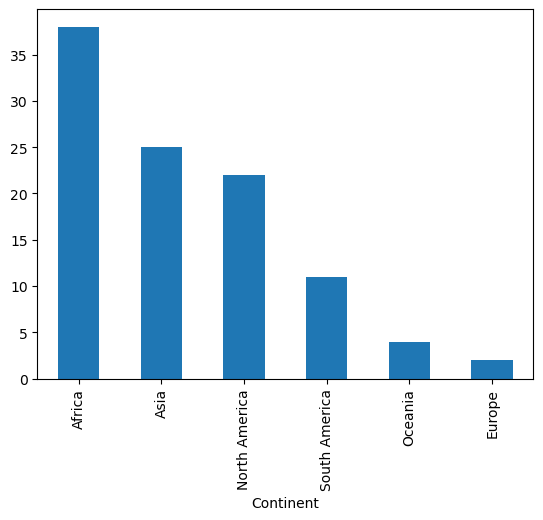

In [21]:
df["Continent"].value_counts().plot(kind="bar")

### Checking Outliers:

C:\Users\majhi\AppData\Local\Temp\ipykernel_11544\1619783291.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\majhi\AppData\Local\Temp\ipykernel_11544\1619783291.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

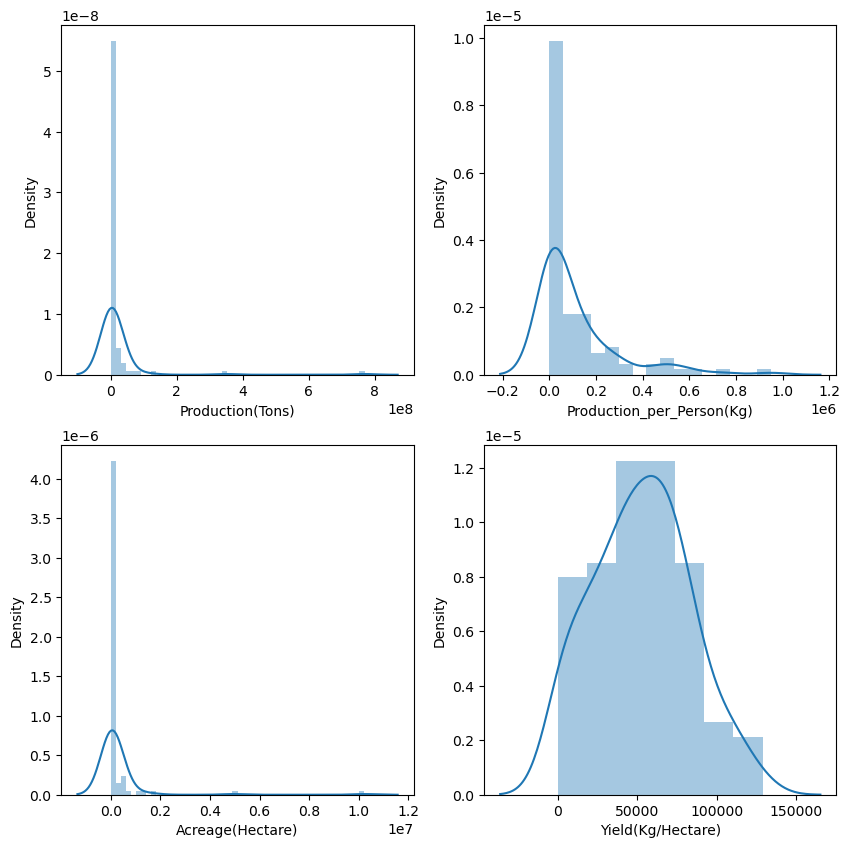

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])


<Axes: >

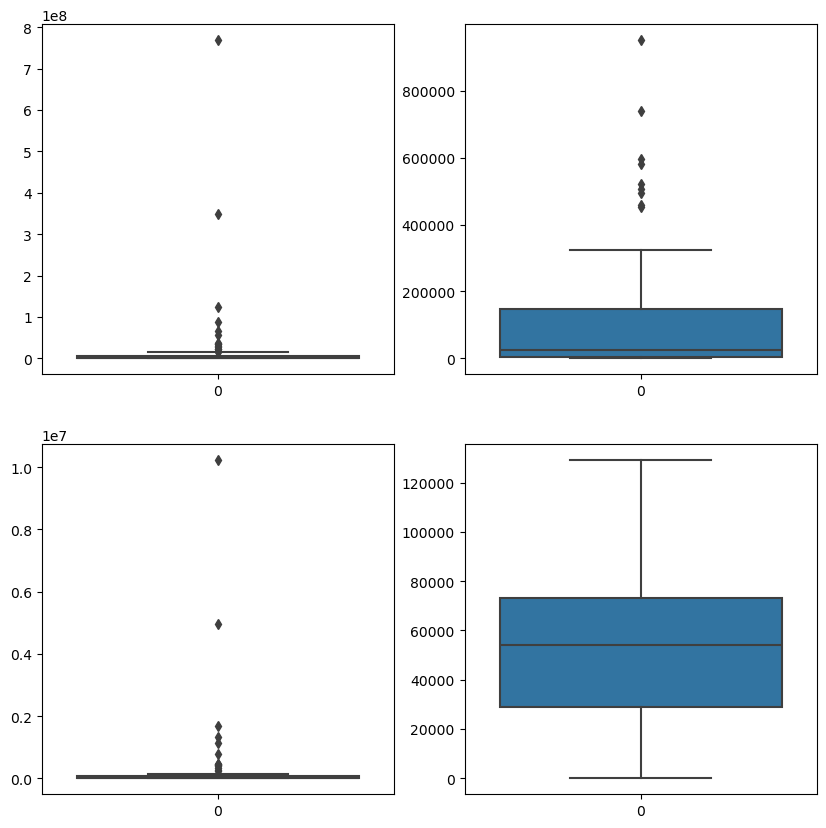

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])


In [24]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### Bivariate Analysis:

In [25]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### which country produces maximum sugarcane?

In [26]:
df_new=df[["Country", "Production(Tons)"]].set_index("Country")

In [27]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [28]:
#### Creating a percentage column
df_new["Production(Tons)_percentage"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()


In [29]:
df_new

,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percentage'>

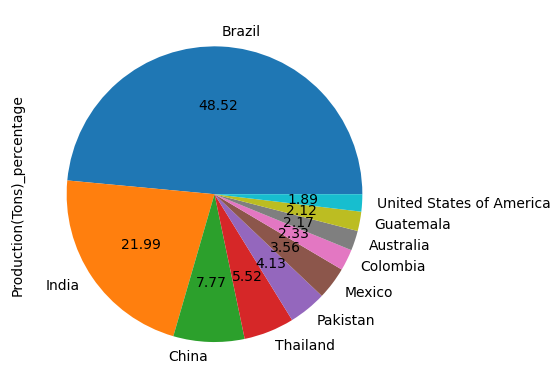

In [30]:
df_new["Production(Tons)_percentage"].head(10).plot(kind="pie", autopct="%.2f")

<Axes: xlabel='Country'>

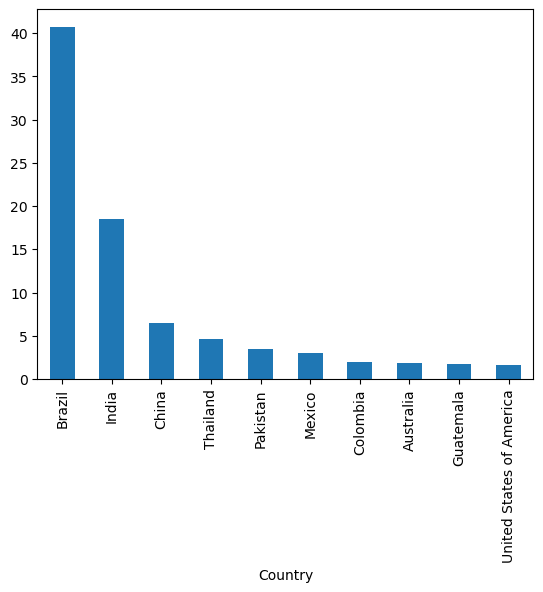

In [31]:
df_new["Production(Tons)_percentage"].head(10).plot(kind="bar")

[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

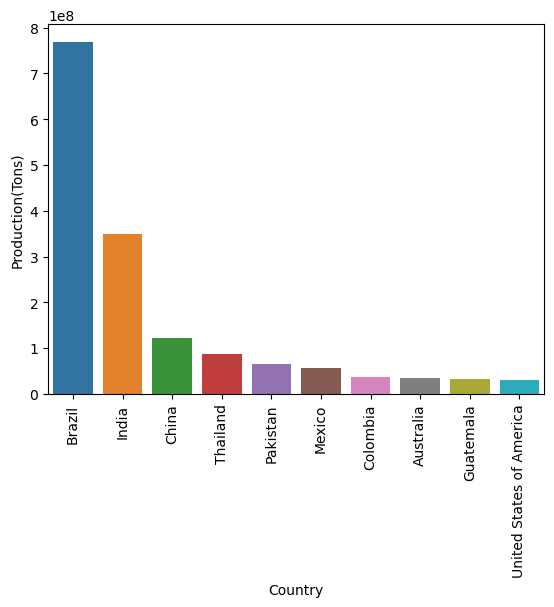

In [32]:
ax=sns.barplot(data=df.head(10), x="Country", y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

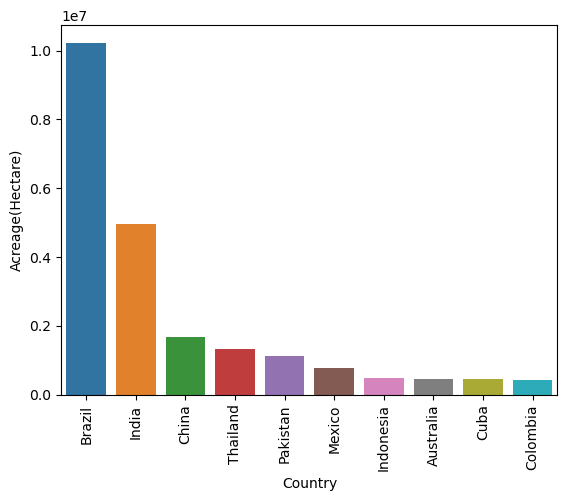

In [33]:
df_acr=df.sort_values("Acreage(Hectare)", ascending=False)  #sorting values which produces most maount of sugar
ax=sns.barplot(data=df_acr.head(10), x="Country", y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Which country has highest yield per hectare?

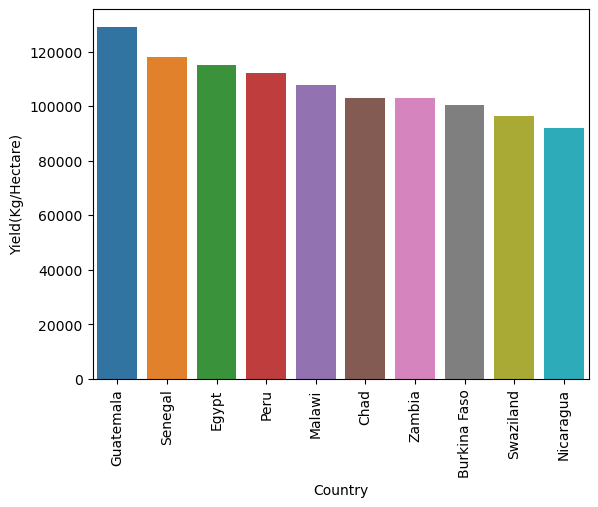

In [36]:
df_yield=df.sort_values("Yield(Kg/Hectare)", ascending=False)  #sorting values which has highest yield
ax=sns.barplot(data=df_yield.head(10), x="Country", y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### correlation:

In [37]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### Bivariate analysis:

In [39]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produces maximum sugarcane?

In [41]:
df_new=df[['Country', 'Production(Tons)']].set_index('Country')

In [43]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [45]:
df_new['Production(Tons)_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [47]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

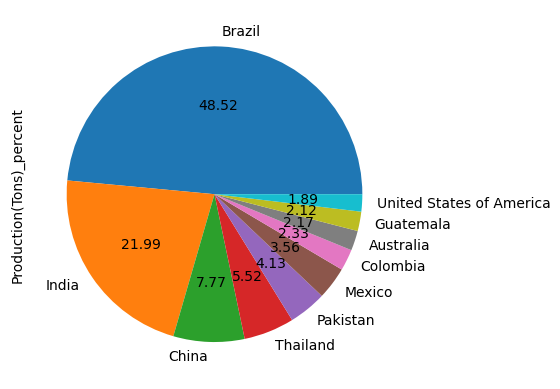

In [51]:
df_new['Production(Tons)_percent'].head(10).plot(kind='pie', autopct='%.2f')

<Axes: xlabel='Country'>

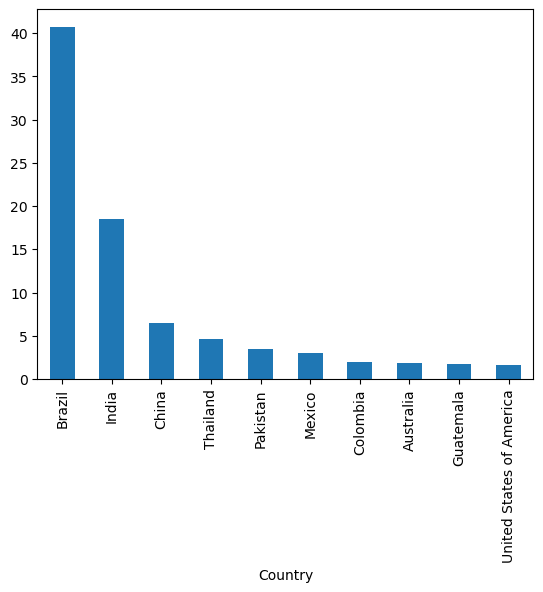

In [52]:
df_new['Production(Tons)_percent'].head(10).plot(kind='bar')

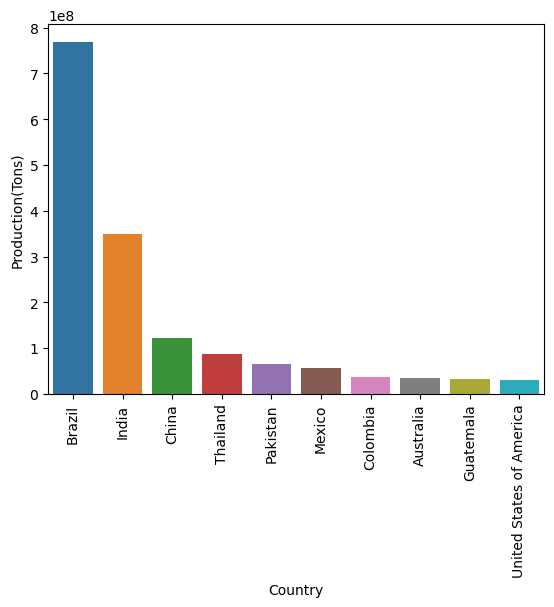

In [60]:
ax=sns.barplot(data=df.head(10), x='Country', y="Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Which country has the highest land?

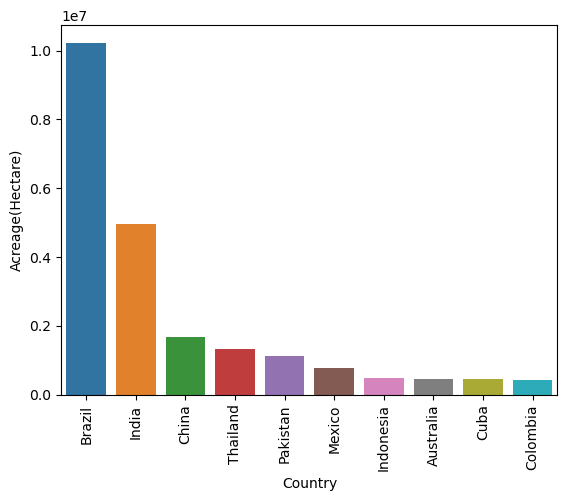

In [59]:
df_acr=df.sort_values("Acreage(Hectare)", ascending=False)
ax=sns.barplot(data=df_acr.head(10), x='Country', y="Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Which country has highest yield per hectare?

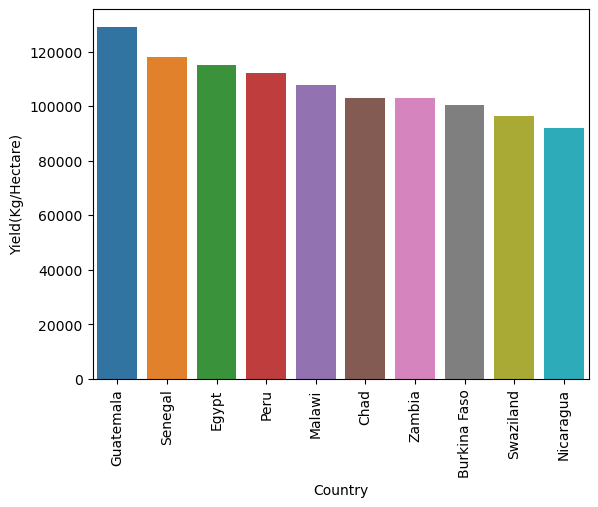

In [62]:
df_yield=df.sort_values("Yield(Kg/Hectare)", ascending=False)
ax=sns.barplot(data=df_yield.head(10), x='Country', y="Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### WHich country has highest production?

### Correlation:

In [63]:
df.corr()

ValueError: could not convert string to float: 'Brazil'

### Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

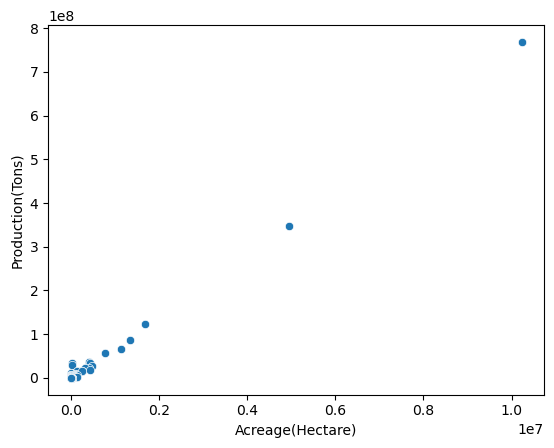

In [65]:
sns.scatterplot(data=df, x="Acreage(Hectare)", y="Production(Tons)")

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

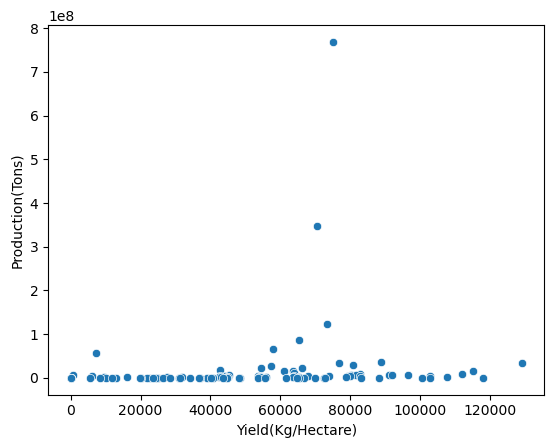

In [67]:
sns.scatterplot(data=df, x="Yield(Kg/Hectare)", y="Production(Tons)")

### Analysis of continent:

In [70]:
df_continent=df.groupby("Continent").sum()

### Which continnet produces maximum sugarcane?

In [75]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [72]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


<Axes: xlabel='Continent'>

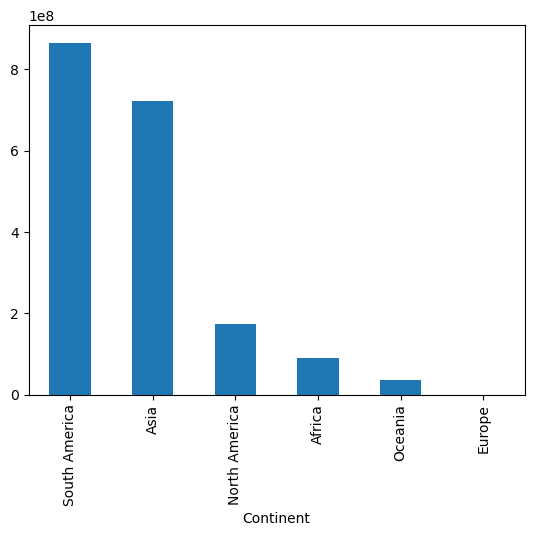

In [76]:
df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Continent'>

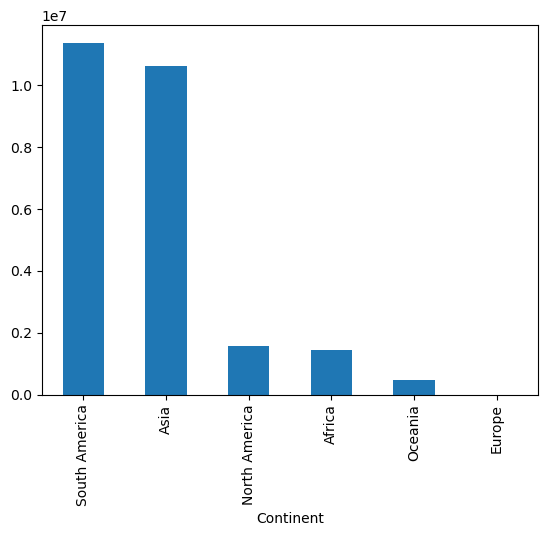

In [78]:
df_continent["Acreage(Hectare)"].sort_values(ascending=False).plot(kind="bar")

<Axes: ylabel='Production(Tons)'>

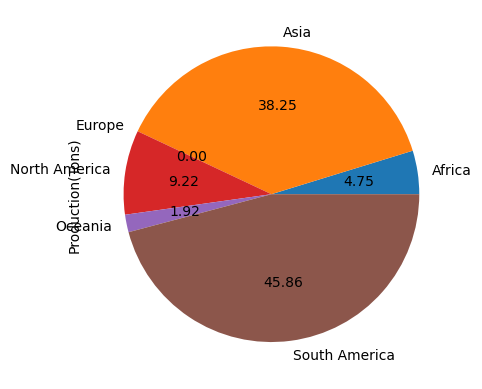

In [80]:
df_continent["Production(Tons)"].plot(kind="pie", autopct="%.2f")